In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# डेटासेट लोड करणे
# Seaborn लायब्ररीमध्ये काही प्रसिद्ध डेटासेट्स आधीपासूनच उपलब्ध असतात.
titanic_df = sns.load_dataset('titanic')

# आपल्या तपासाची सुरुवात: डेटाचे पहिले दर्शन
print("First 5 rows of the Titanic dataset:\n")
print(titanic_df.head())

print("\nBasic information about the dataset:\n")
titanic_df.info()

First 5 rows of the Titanic dataset:

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Basic information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dty

In [2]:
# संख्यात्मक स्तंभांचे वर्णन
print("Descriptive statistics for numerical columns:\n")
print(titanic_df.describe())

Descriptive statistics for numerical columns:

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [3]:
# कॅटेगोरिकल स्तंभांचे वर्णन
print("\nDescriptive statistics for categorical columns:\n")
print(titanic_df.describe(include=['object', 'category', 'bool']))


Descriptive statistics for categorical columns:

         sex embarked  class  who adult_male deck  embark_town alive alone
count    891      889    891  891        891  203          889   891   891
unique     2        3      3    3          2    7            3     2     2
top     male        S  Third  man       True    C  Southampton    no  True
freq     577      644    491  537        537   59          644   549   537


In [4]:
# 'survived' स्तंभाची तपासणी
print("Survival Counts:\n", titanic_df['survived'].value_counts())
# 0 = Not Survived, 1 = Survived

print("\nPassenger Class Counts:\n", titanic_df['pclass'].value_counts())

Survival Counts:
 survived
0    549
1    342
Name: count, dtype: int64

Passenger Class Counts:
 pclass
3    491
1    216
2    184
Name: count, dtype: int64


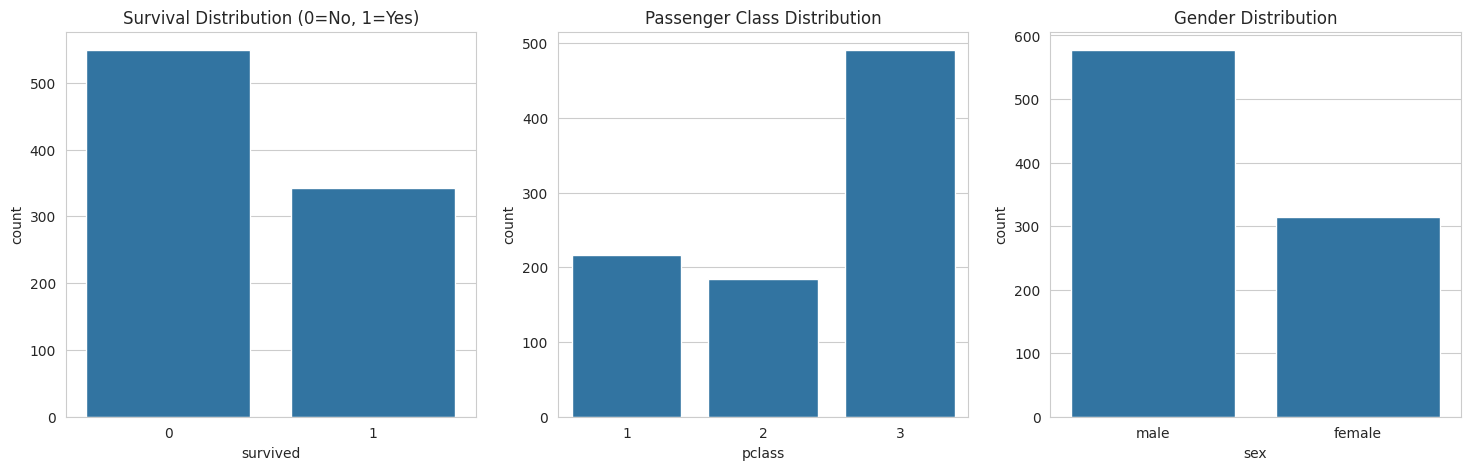

In [5]:
# आलेख काढण्यासाठी स्टाईल सेट करणे
sns.set_style("whitegrid")

# तीन कॅटेगोरिकल व्हेरिएबल्ससाठी काउंट प्लॉट काढणे
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='survived', data=titanic_df, ax=axes[0])
axes[0].set_title('Survival Distribution (0=No, 1=Yes)')

sns.countplot(x='pclass', data=titanic_df, ax=axes[1])
axes[1].set_title('Passenger Class Distribution')

sns.countplot(x='sex', data=titanic_df, ax=axes[2])
axes[2].set_title('Gender Distribution')

plt.show()

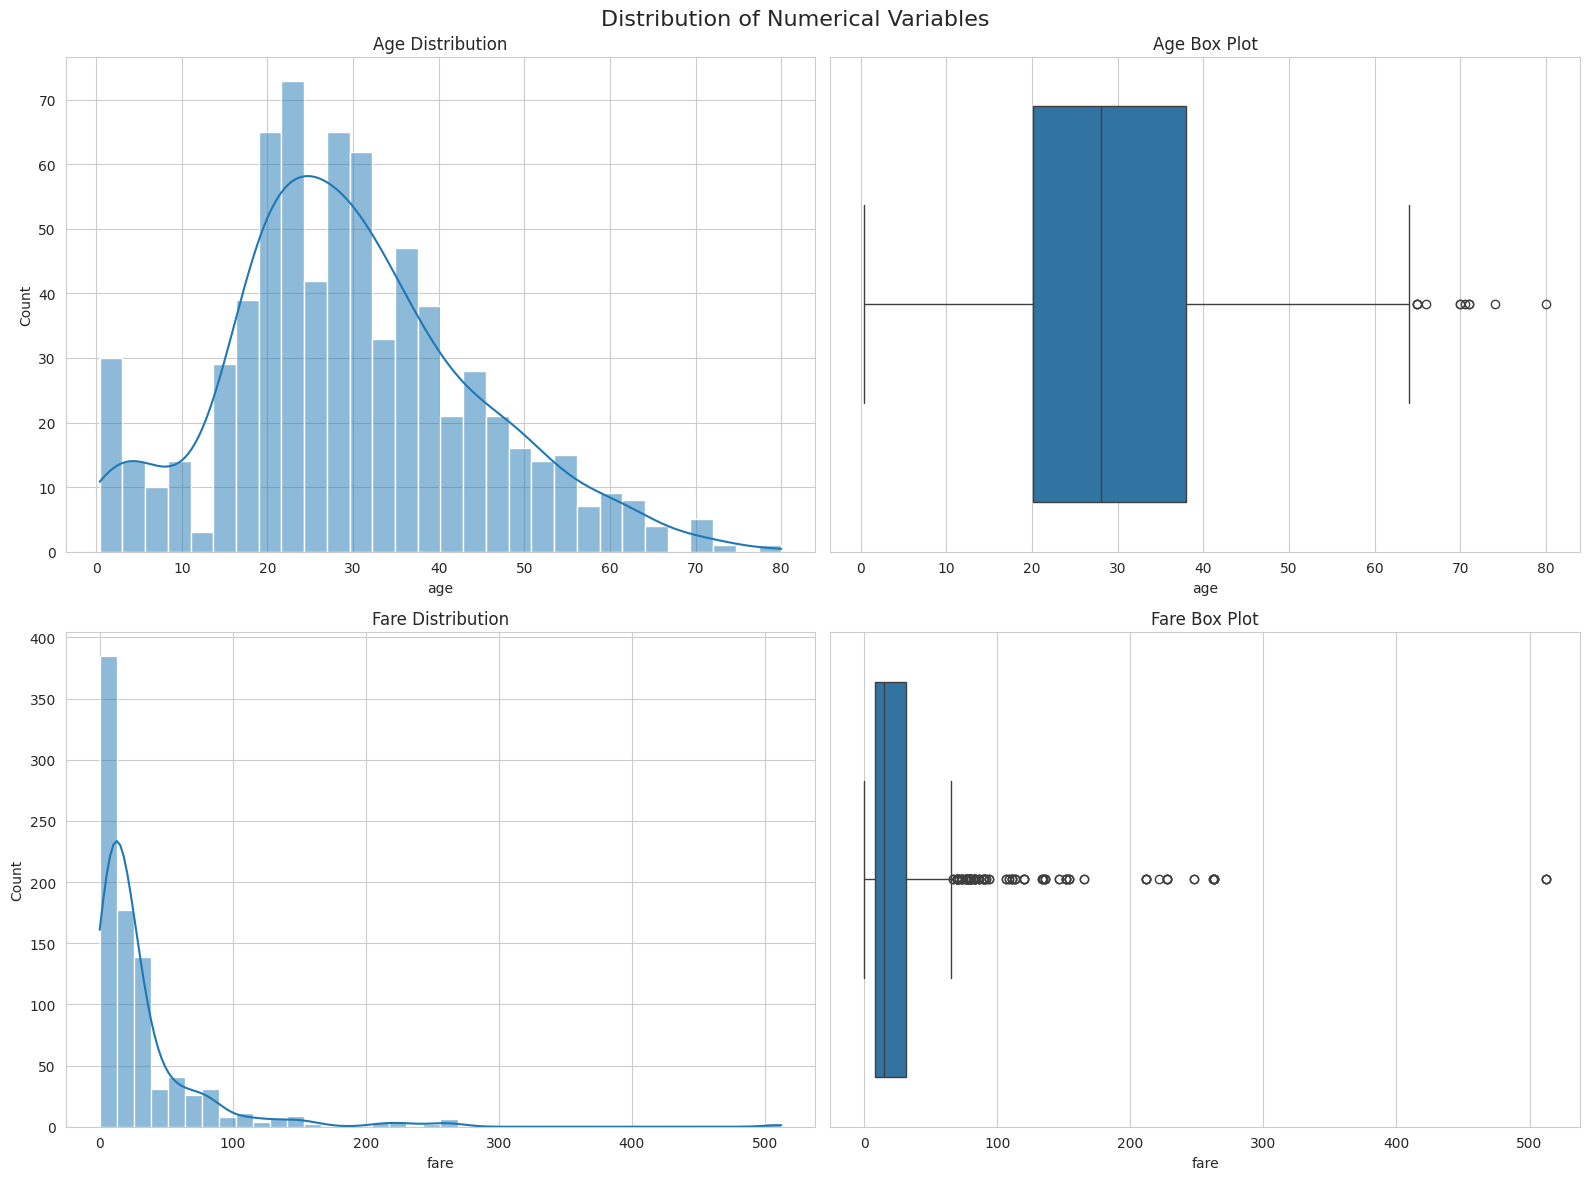

In [6]:
# 'age' आणि 'fare' या संख्यात्मक व्हेरिएबल्ससाठी हिस्टोग्राम आणि बॉक्स प्लॉट काढणे
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Age चा हिस्टोग्राम
sns.histplot(titanic_df['age'].dropna(), kde=True, bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Age चा बॉक्स प्लॉट
sns.boxplot(x=titanic_df['age'], ax=axes[0, 1])
axes[0, 1].set_title('Age Box Plot')

# Fare चा हिस्टोग्राम
sns.histplot(titanic_df['fare'], kde=True, bins=40, ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution')

# Fare चा बॉक्स प्लॉट
sns.boxplot(x=titanic_df['fare'], ax=axes[1, 1])
axes[1, 1].set_title('Fare Box Plot')

plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

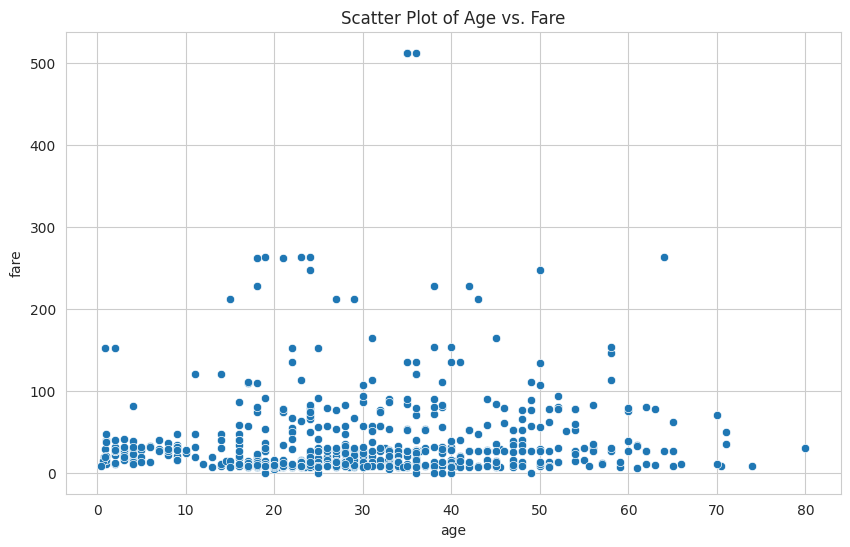

In [7]:
# 'age' आणि 'fare' यांच्यात स्कॅटर प्लॉट
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', data=titanic_df)
plt.title('Scatter Plot of Age vs. Fare')
plt.show()

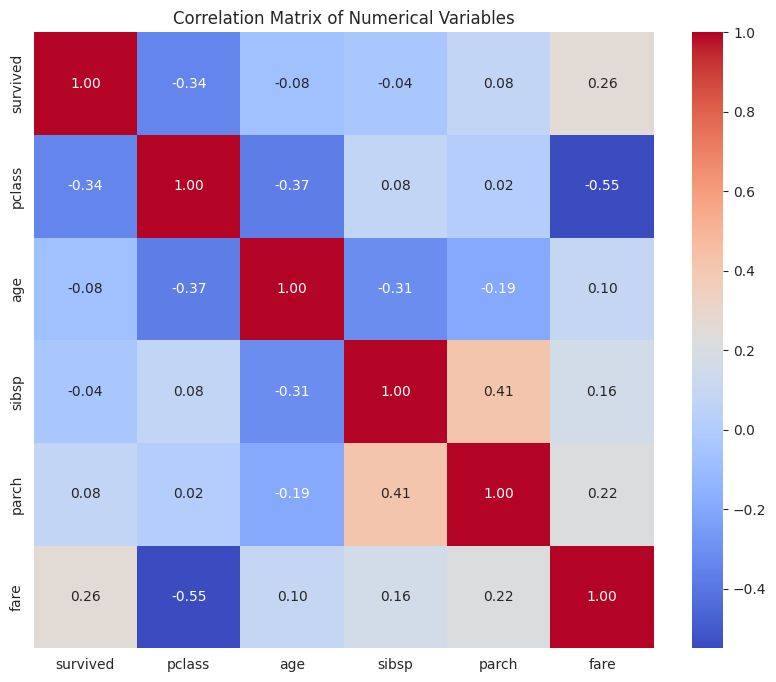

In [8]:
# संख्यात्मक स्तंभांची निवड करणे
numerical_df = titanic_df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]

# सहसंबंध मॅट्रिक्स काढणे
correlation_matrix = numerical_df.corr()

# हीटमॅप काढणे
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

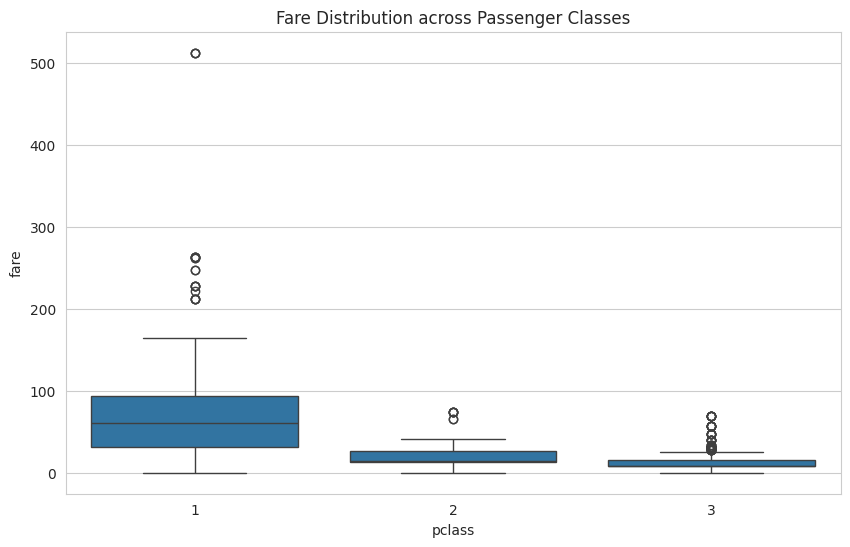

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=titanic_df)
plt.title('Fare Distribution across Passenger Classes')
plt.show()

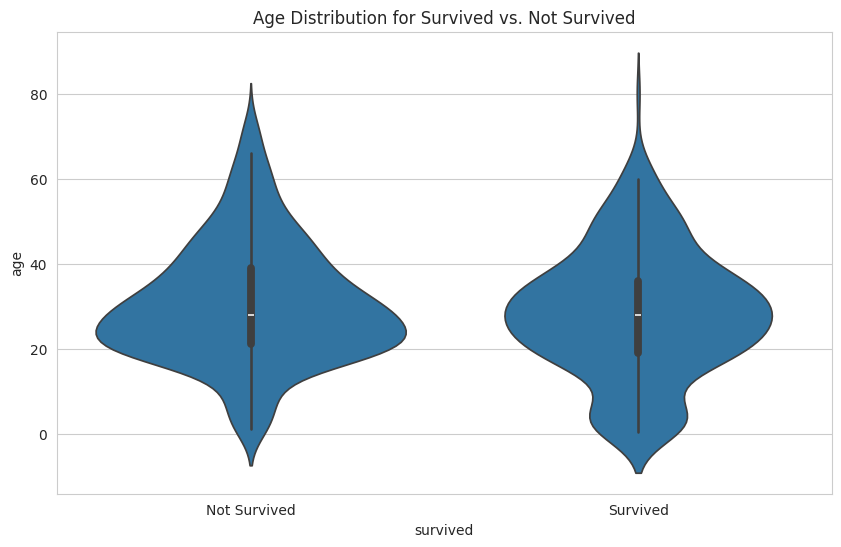

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='survived', y='age', data=titanic_df)
plt.title('Age Distribution for Survived vs. Not Survived')
plt.xticks([0, 1], ['Not Survived', 'Survived']) # 0 आणि 1 ला योग्य लेबल्स देणे
plt.show()

In [11]:
# लिंग आणि वाचण्याची शक्यता यांच्यातील क्रॉस-टॅब्युलेशन
sex_survival_crosstab = pd.crosstab(titanic_df['sex'], titanic_df['survived'])
sex_survival_crosstab.columns = ['Not Survived', 'Survived'] # स्तंभांना योग्य नावे देणे

print("Crosstab of Sex vs. Survival:\n")
print(sex_survival_crosstab)

Crosstab of Sex vs. Survival:

        Not Survived  Survived
sex                           
female            81       233
male             468       109


In [12]:
# टक्केवारीमध्ये पाहणे (प्रत्येक लिंगाच्या आडव्या ओळीनुसार)
print("\nSurvival Rate by Sex:\n")
print(sex_survival_crosstab.apply(lambda r: r/r.sum(), axis=1).round(2))


Survival Rate by Sex:

        Not Survived  Survived
sex                           
female          0.26      0.74
male            0.81      0.19


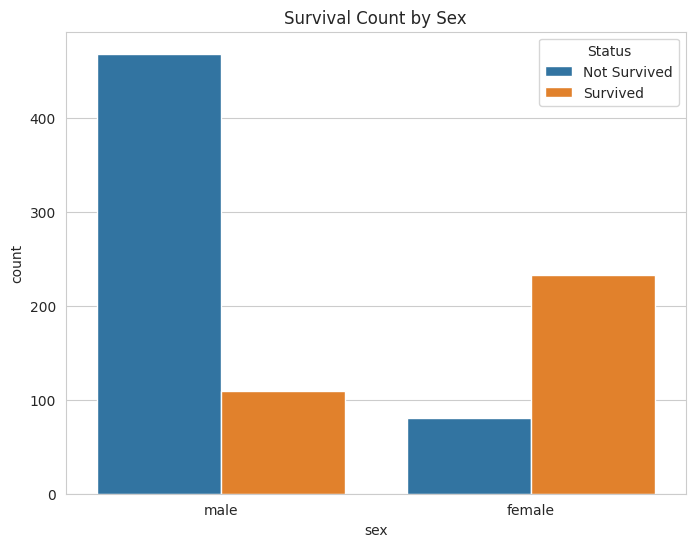

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=titanic_df)
plt.title('Survival Count by Sex')
plt.legend(title='Status', labels=['Not Survived', 'Survived'])
plt.show()

Crosstab of Pclass vs. Survival:

        Not Survived  Survived
pclass                        
1                 80       136
2                 97        87
3                372       119

Survival Rate by Pclass:

        Not Survived  Survived
pclass                        
1               0.37      0.63
2               0.53      0.47
3               0.76      0.24


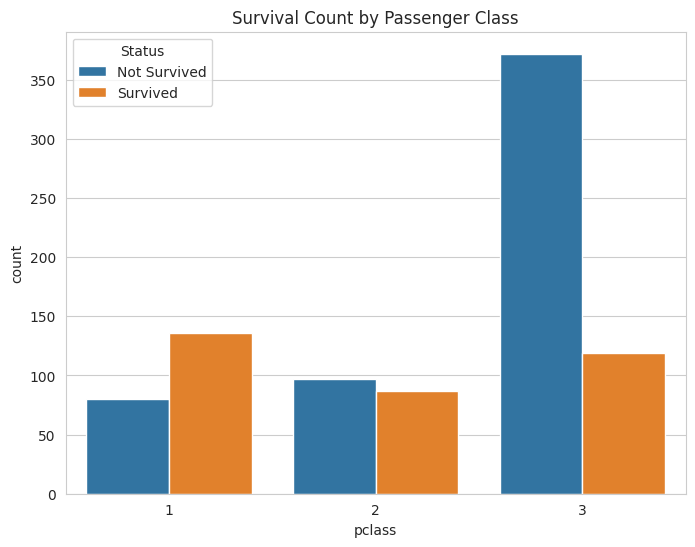

In [14]:
pclass_survival_crosstab = pd.crosstab(titanic_df['pclass'], titanic_df['survived'])
pclass_survival_crosstab.columns = ['Not Survived', 'Survived']
print("Crosstab of Pclass vs. Survival:\n")
print(pclass_survival_crosstab)

# टक्केवारीमध्ये पाहणे
print("\nSurvival Rate by Pclass:\n")
print(pclass_survival_crosstab.apply(lambda r: r/r.sum(), axis=1).round(2))

# व्हिज्युअलायझेशन
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.legend(title='Status', labels=['Not Survived', 'Survived'])
plt.show()

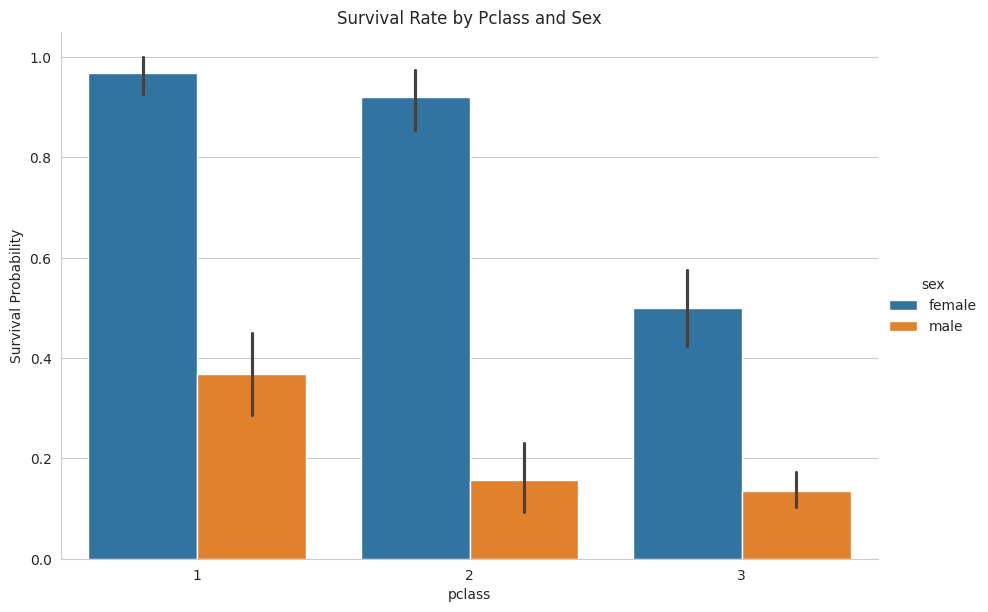

In [15]:
# प्रवासी वर्ग आणि लिंग यांचा वाचण्याच्या शक्यतेवरील एकत्रित परिणाम पाहणे
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic_df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel("Survival Probability")
plt.show()

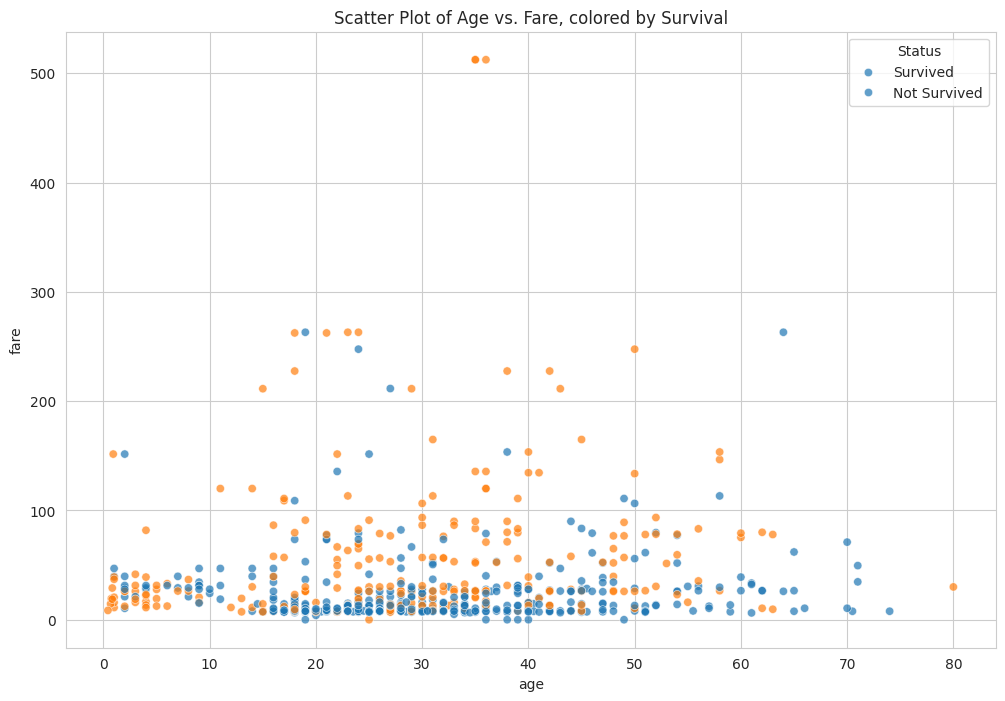

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic_df, alpha=0.7)
plt.title('Scatter Plot of Age vs. Fare, colored by Survival')
plt.legend(title='Status', labels=['Survived', 'Not Survived']) # लेबल्स योग्य क्रमाने देणे
plt.show()